# Loading Packages

In [292]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

#=========Importing models for classification efficiency
from sklearn.metrics import accuracy_score, classification_report

#===========Importing Classifier=========
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn import tree
import pickle



# Reading Data

In [293]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train_original=train.copy() 
test_original=test.copy()

## Understanding data

In [294]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [295]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [296]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [297]:
train.shape, test.shape

((614, 13), (367, 12))

## Univaraite Analysis
### Target Variable
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

In [298]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [299]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

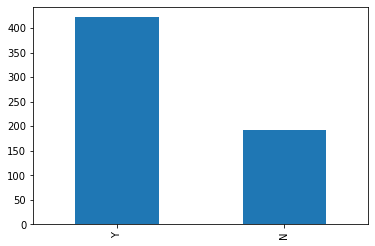

In [300]:
train['Loan_Status'].value_counts().plot.bar()

### Independent Variable (Categorical)

#### 422(around 69%) people out of 614 got the approval.

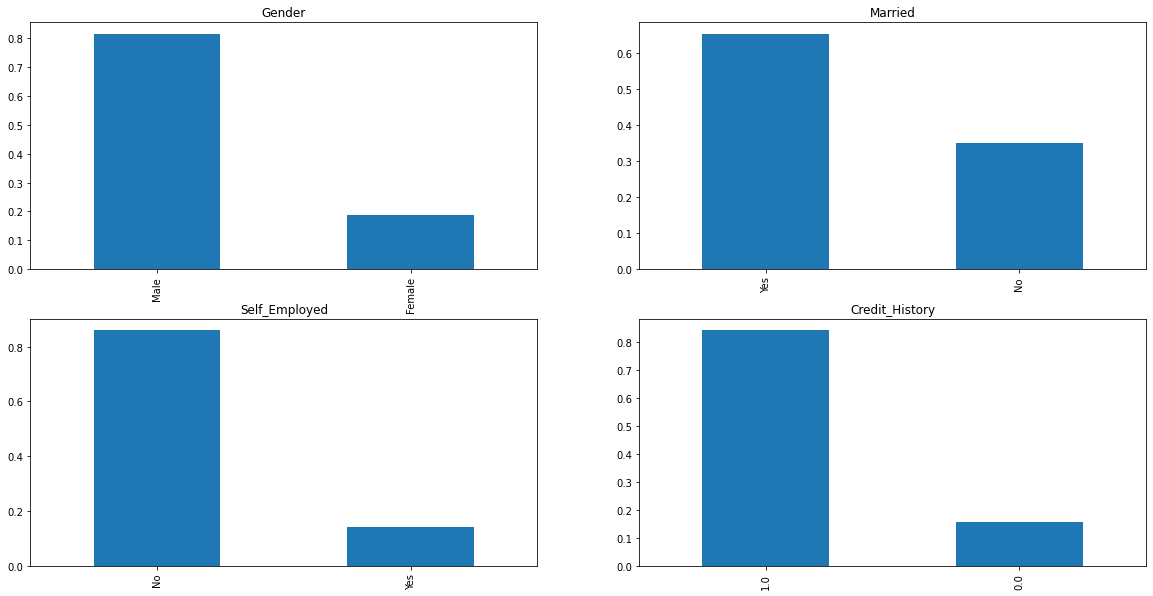

In [301]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()


##### It can be inferred from the above bar plots that:

* 80% of applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* About 15% of applicants in the dataset are self-employed.
* About 85% of applicants have repaid their debts.



## Independent Variable (Ordinal)

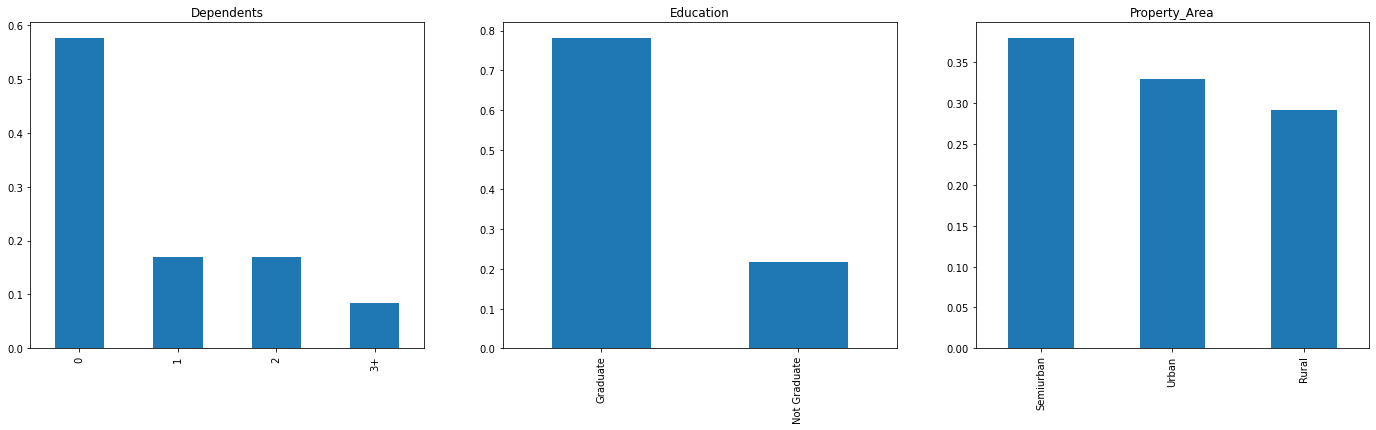

In [302]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

##### Following inferences can be made from the above bar plots:

* Most of the applicants don’t have dependents.
* About 80% of the applicants are graduates.
* Most of the applicants are from semi-urban areas.

## Independent Variable (Numerical)

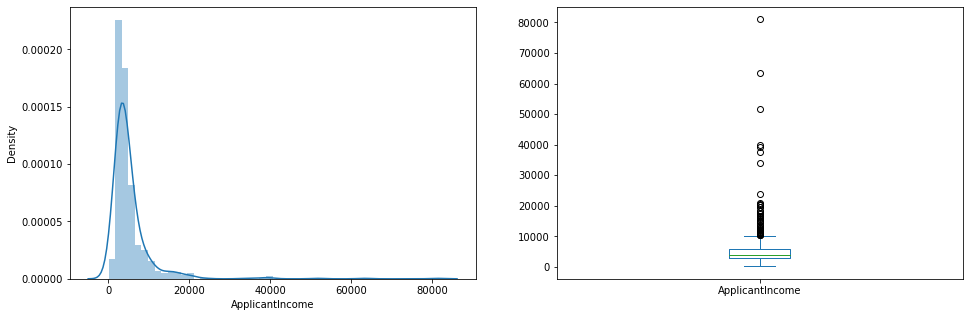

In [303]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

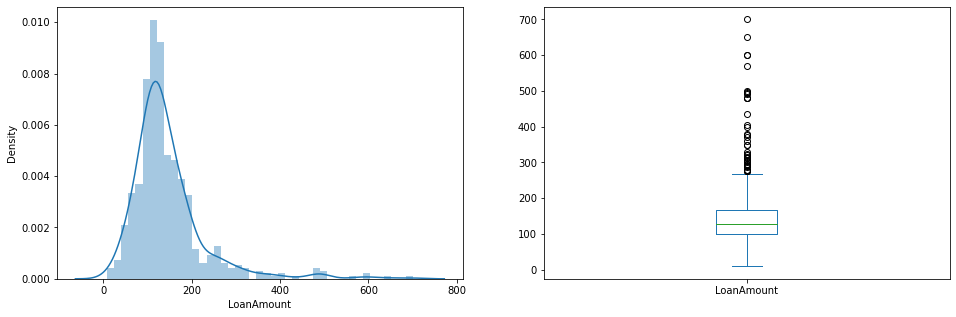

In [304]:
plt.figure(1) 
plt.subplot(121)
df=train.dropna() 
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

# Bivariate Analysis

* Applicants with high incomes should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.
* Let’s try to test the above-mentioned hypotheses using bivariate analysis

## Categorical Independent Variable vs Target Variable 



<AxesSubplot:xlabel='Gender'>

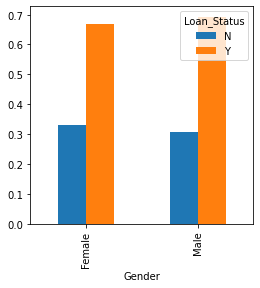

In [305]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

* It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

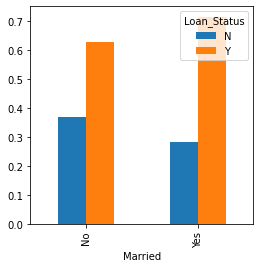

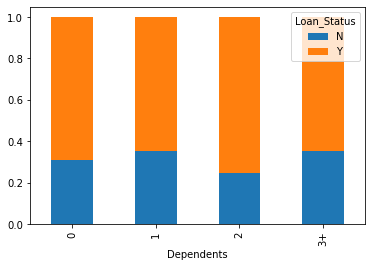

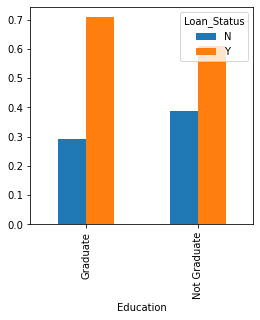

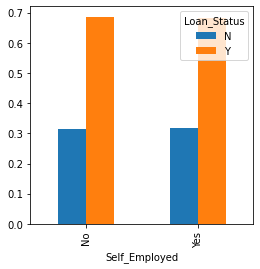

In [306]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

#### * The proportion of married applicants is higher for the approved loans.
#### * The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#### * There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

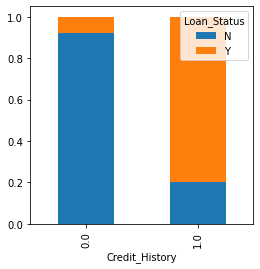

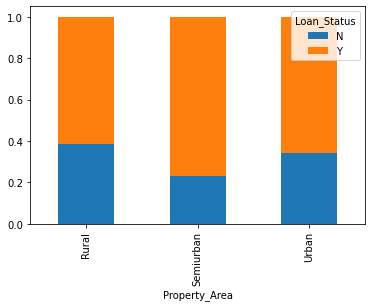

In [307]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

#### * It seems people with a credit history of 1 are more likely to get their loans approved.
#### * The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.


## Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

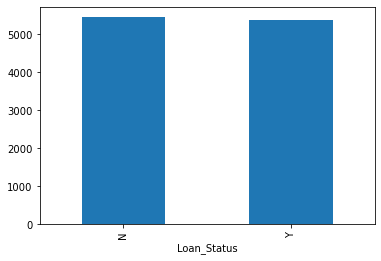

In [308]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [309]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

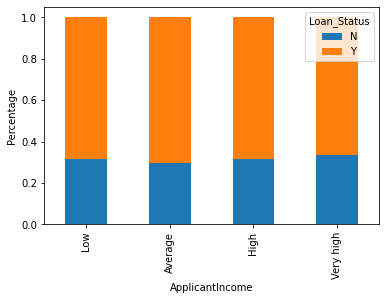

In [310]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

* It can be inferred that Applicant’s income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant’s income is high the chances of loan approval will also be high.



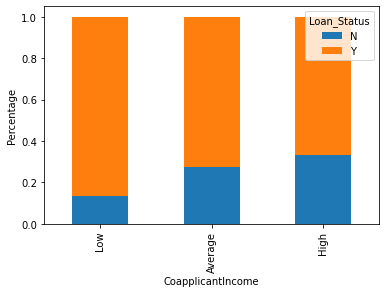

In [311]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

* It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and co applicants’ income to visualize the combined effect of income on loan approval.



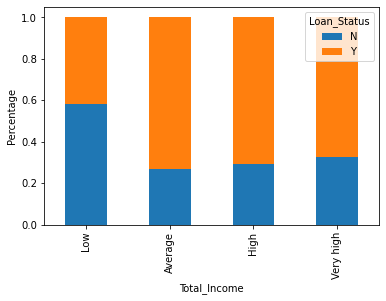

In [312]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')


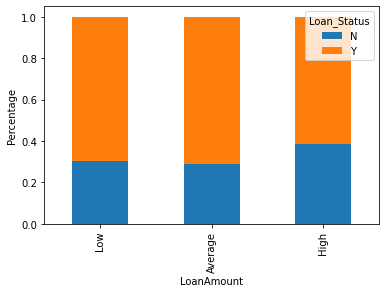

In [313]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

* It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval will be high when the loan amount is less.

### Loading and Transforming the data to Numerical Values

In [314]:
#========Loading the dataset======
loan = pd.read_csv('data/loan.csv')

#==========Visualising the Dataset======
loan.head()

#=======Checking the presence of Null Values=========
#==== We use built in Function isnull() and sum()
loan.isnull().sum()

#========filling null values in Column with Numerical Values============
#===========Loading the Required libray
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
loan_n = loan.iloc[:, 8:11]
dependat =loan['Dependents']
dependat = dependat.replace('3+', 3)
loan_n1 = loan.iloc[:, 3:4]
imputer.fit(loan_n)
loan_n = imputer.transform(loan_n)
loan_d = pd.DataFrame(loan_n)
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [315]:
loan['LoanAmount'],loan['Loan_Amount_Term'], loan['Credit_History'] = loan_d[0], loan_d[1], loan_d[2]
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [316]:
employ = loan['Self_Employed']
P_area = loan['Property_Area']
gender = loan["Gender"]
status = loan["Married"]
education = loan["Education"]
loan_status = loan['Loan_Status']


status = status.fillna("Yes")
gender = gender.fillna("Male")
P_area= P_area.fillna("Rural")
employ= employ.fillna("Yes")
dependat = dependat.fillna(1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#========Initializing String to be Encoded==========

input_class = ["Male", "Female"]
input_class1 = ["Yes", "No"]
input_class2 = ["Rural", "Urban", "Semiurban"]
input_class3 = ["Graduate", "Not Graduate"]
input_class4 = ["Y", "N"]

label_encoder.fit(input_class)


gender = gender.iloc[:].values
gender = list(gender)
gender = label_encoder.transform(gender)

label_encoder.fit(input_class1)

status = status.iloc[:].values
employ = employ.iloc[:].values
employ = list(employ)
status = list(status)
status = label_encoder.transform(status)
employ = label_encoder.transform(employ)


label_encoder.fit(input_class2)

P_area = P_area.iloc[:].values
P_area = list(P_area)
P_area = label_encoder.transform(P_area)

label_encoder.fit(input_class3)

education = education.iloc[:].values
education = list(education)
education = label_encoder.transform(education)

label_encoder.fit(input_class4)

loan_status = loan_status.iloc[:].values
loan_status =list(loan_status)
loan_status = label_encoder.transform(loan_status)

### New CSV generated to save the data

In [317]:
loan['Education'],loan['Self_Employed'],loan['Property_Area'],loan["Gender"],loan["Married"], loan['Loan_Status'], loan['Dependents'] =education, employ, P_area, gender, status, loan_status, dependat
loan.head()
loan.to_csv("data/Loan Processed data.csv")

### CSV for the Expected results for the newmerical values

In [318]:
data = loan.iloc[:, 1:-1]
target = loan.iloc[:, -1:]

In [319]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0


In [320]:
target.head(2)

,Loan_Status
0,1
1,0


In [321]:
data.to_csv("data/Data.csv")
target.to_csv("data/Target.csv")

# Model Comparision 

In [322]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 1/5, random_state=10)

model_a = RandomForestClassifier()
model_a.fit(x_train, y_train)
pred = model_a.predict(x_test)
forest = accuracy_score(y_test, pred)



from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
k = accuracy_score(y_test, pred)


from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
MB= accuracy_score(y_test, pred)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
GB=accuracy_score(y_test, pred)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
LR=accuracy_score(y_test, pred)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
DTC=  accuracy_score(y_test, pred)

print ("""The result were as Follows\nRandom Forest Classifer {}\n\nK Nearest Neighbors {}\n\nMultinomial NB {}\n\nGaussian NB {}\n\nLogistic Regression {}\n\nDecision Tree Classifier {}
""".format(forest,k, MB, GB, LR, DTC))

The result were as Follows
Random Forest Classifer 0.7642276422764228

K Nearest Neighbors 0.6097560975609756

Multinomial NB 0.5365853658536586

Gaussian NB 0.7804878048780488

Logistic Regression 0.7967479674796748

Decision Tree Classifier 0.7154471544715447



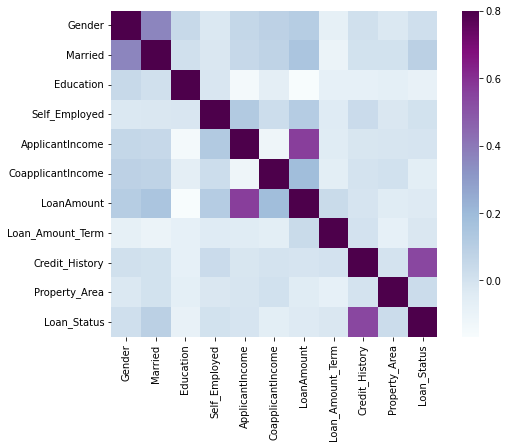

In [323]:
matrix =loan.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Missing Value and Outlier Treatment

### Missing Value Imputation

In [324]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [325]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [326]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [327]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [328]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### Outlier Treatment

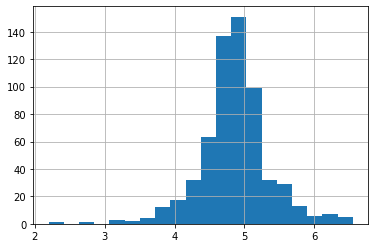

In [329]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])


## Evaluation Metrics for Classification
### Model Building: Part 1

* Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
* Logistic regression is an estimation of the Logit function. The logit function is simply a log of odds in favor of the event.
* This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

In [330]:

train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [331]:


X1 = train.drop('Loan_Status',1) 
y1 = train.Loan_Status

X1=pd.get_dummies(X1) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

x1_train, x_cv, y1_train, y_cv = train_test_split(X1,y1, test_size =0.3)

In [332]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x1_train, y1_train)

LogisticRegression()

In [333]:
pred_cv = model.predict(x_cv)

In [334]:
accuracy_score(y_cv,pred_cv)

0.7189189189189189

* So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

In [341]:
pred_test = model.predict(test)


ValueError: X has 21 features, but LogisticRegression is expecting 36 features as input.

In [336]:
submission=pd.read_csv("data/Target.csv")


In [337]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [338]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('data/logistic.csv')

# Logistic Regression Using Stratified k-folds Cross-validation

To check how robust our model is to unseen data, we can use Validation. It is a technique that involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

* The validation set approach
* k-fold cross-validation
* Leave one out cross-validation (LOOCV)
* Stratified k-fold cross-validation


In [340]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X1,y1):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X1.iloc[train_index],X1.iloc[test_index]
     ytr,yvl = y1.iloc[train_index],y1.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

n1 of kfold 5
accuracy_score 0.7967479674796748
n2 of kfold 5
accuracy_score 0.8130081300813008
n3 of kfold 5
accuracy_score 0.6747967479674797
n4 of kfold 5
accuracy_score 0.7723577235772358
n5 of kfold 5
accuracy_score 0.7786885245901639


ValueError: X has 21 features, but LogisticRegression is expecting 36 features as input.

#### The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve.

<AxesSubplot:>

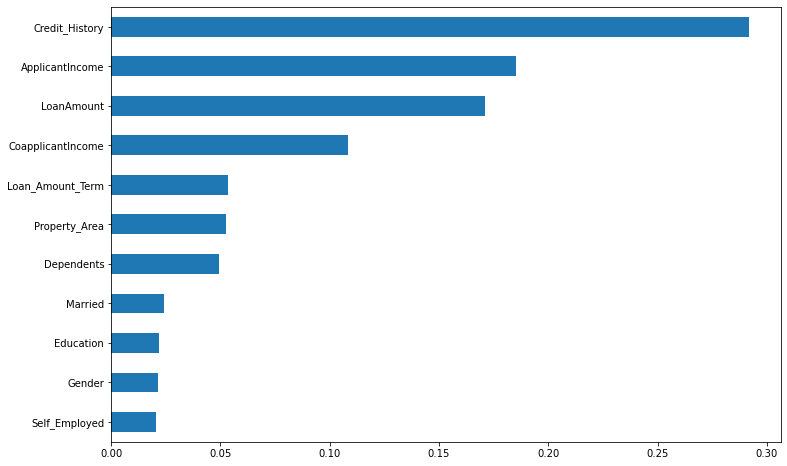

In [ ]:
importances=pd.Series(model_a.feature_importances_, index=data.columns)
importances.sort_values(inplace=True) 
importances.plot(kind='barh', figsize=(12,8))


In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(, test_size = 0.2, random_state = 0)
#model =  RandomForestClassifier()
#model.fit(x_train, y_train)
#file = open('loan_status.pkl', 'wb')
#pickle.dump(model, file)

NameError: name 'y_resample' is not defined